In [10]:
import pdat
import os
import numpy as np
import antropy as ant
import matplotlib.pyplot as plt


In [11]:
file_names = ['f210820_041554.DFp', 
            'f210820_105959.DFp',
            'f210823_120959.DFp',
            'f210823_124534.DFp',
            'f210828_190858.DFp',
            'f210906_152306.DFp',
            'f210920_142859.DFp',
            'f210921_002549.DFp',
            'f210921_004724.DFp',
            'f210922_085559.DFp',
            'f210929_090945.DFp']

Loading PSRFITS file from path:
    'Wang/f210820_041554.DFp'.
(101769, 1, 1, 512)


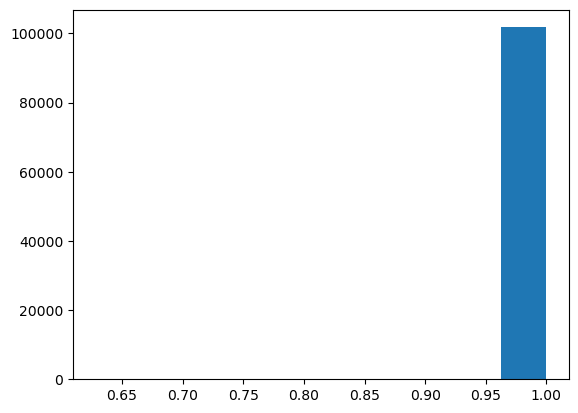

Loading PSRFITS file from path:
    'Wang/f210820_105959.DFp'.
(125899, 1, 1, 256)


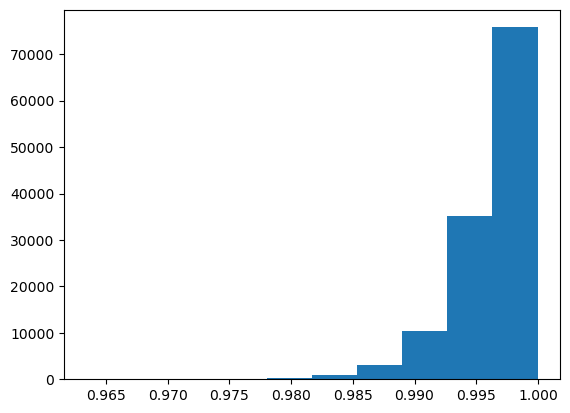

Loading PSRFITS file from path:
    'Wang/f210823_120959.DFp'.
(225500, 1, 1, 512)


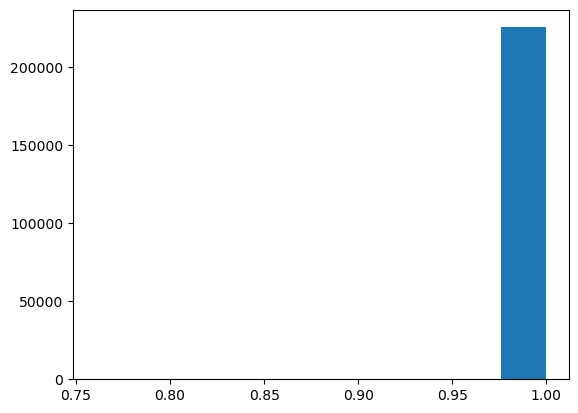

Loading PSRFITS file from path:
    'Wang/f210823_124534.DFp'.
(152940, 1, 1, 512)


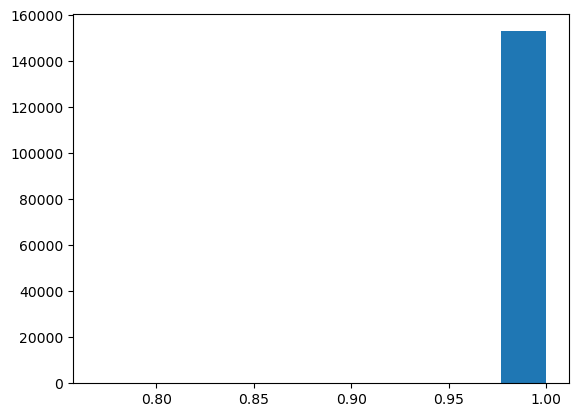

Loading PSRFITS file from path:
    'Wang/f210828_190858.DFp'.
(117075, 1, 1, 256)


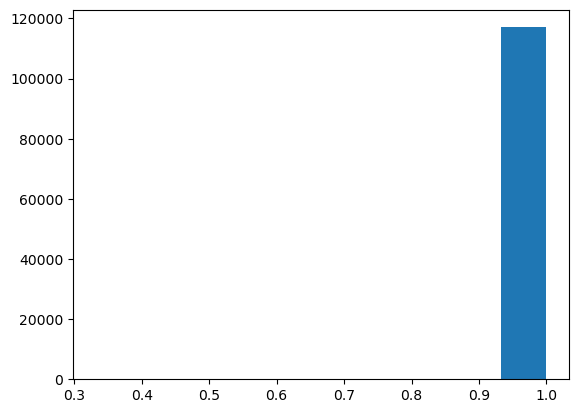

Loading PSRFITS file from path:
    'Wang/f210906_152306.DFp'.
(72971, 1, 1, 1024)


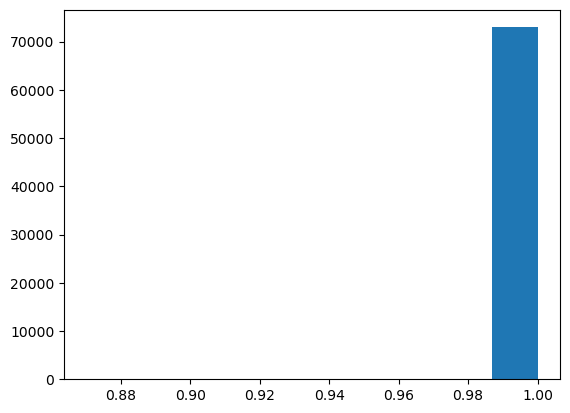

Loading PSRFITS file from path:
    'Wang/f210920_142859.DFp'.
(123483, 1, 1, 256)


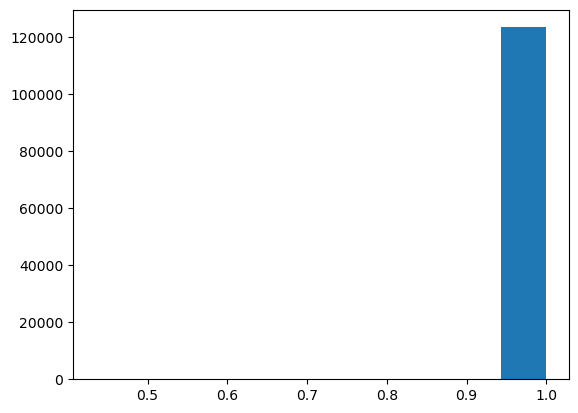

Loading PSRFITS file from path:
    'Wang/f210921_002549.DFp'.
(186623, 1, 1, 256)


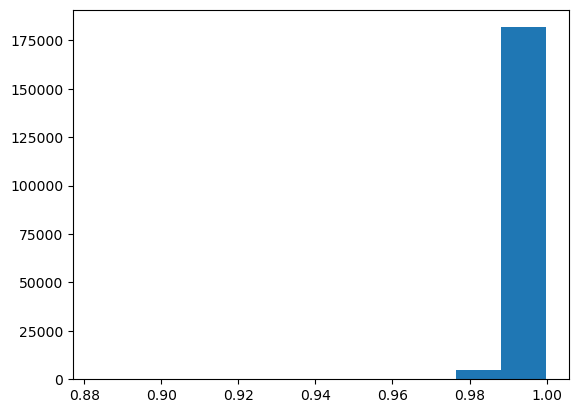

Loading PSRFITS file from path:
    'Wang/f210921_004724.DFp'.
(121103, 1, 1, 256)


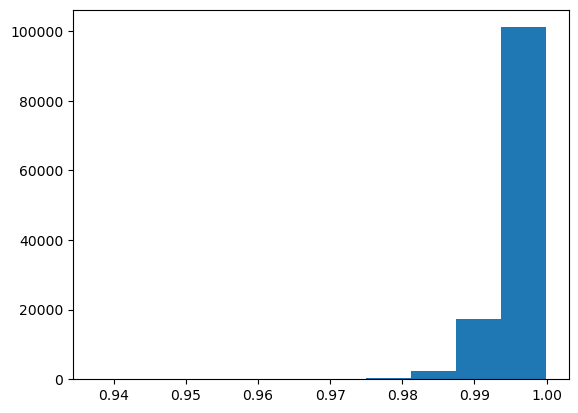

Loading PSRFITS file from path:
    'Wang/f210922_085559.DFp'.
(91124, 1, 1, 256)


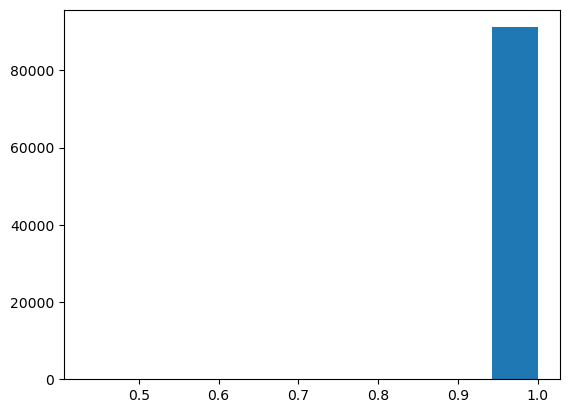

Loading PSRFITS file from path:
    'Wang/f210929_090945.DFp'.
(97484, 1, 1, 256)


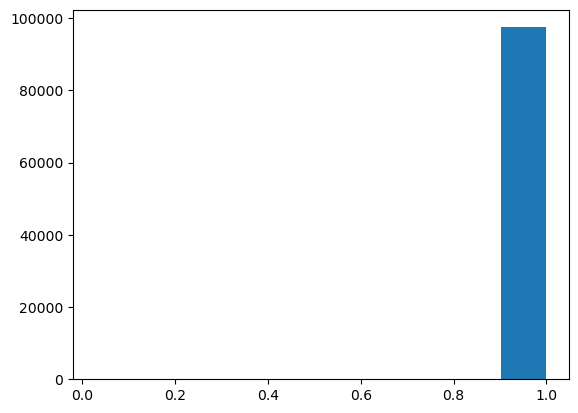

In [12]:
# psrf1 = pdat.psrfits('Wang/raw/f210820_041554.DFp')
# psrf1[4].read_header()

for address in file_names:   
    # print('Wang/'+address)
    psrfit_data = pdat.psrfits('Wang/'+address)
    if address=="f210906_152306.DFp" or address == 'f210921_004724.DFp':
        data_all = psrfit_data[1].read()
    else:
        data_all = psrfit_data[4].read()
      
    DATA     = data_all["DATA"] 
    DAT_SCL  = data_all["DAT_SCL"]
    DAT_OFFS = data_all["DAT_OFFS"]
    DAT_FREQ = data_all["DAT_FREQ"]
    print(np.shape(DATA))
    Flux_all = np.zeros([np.shape(DATA)[3],1])  # average pulse profile
    
    # initilizing Statistical measures for single pulses 
    perm_entropy_single_pulses = np.zeros([np.shape(DATA)[0],1])
    
    # Loading Single Pulses 
    for i in range(np.shape(DATA)[0]):
        Single_Pulses = np.zeros(np.shape(DATA)[3]) # Single pulse profiles for each frequesncy 
        Single_Pulses = DATA[i,0,0,:]*DAT_SCL[i] + DAT_OFFS[i]
        # call any statistics/complexity functions and replace it with np.std
        perm_entropy_single_pulses[i] = ant.perm_entropy(Single_Pulses, order=3, delay=1, normalize=True)

    plt.hist(perm_entropy_single_pulses)
    plt.savefig('statFigs/perm_entropy/' + address+'.png', dpi=400)
    plt.show()
    #plotting average pulse 
    # for i in range(np.shape(DATA)[3]):
    #     Flux_all[i] = np.sum(DATA[:,0,0,i]*DAT_SCL[:] + DAT_OFFS[:])
    
    
    # # # seems like we have 512 time channels in 
    # fig = plt.figure()
    # plt.plot(Flux_all/np.max(Flux_all))
    # plt.xlabel('Phase')
    # plt.ylabel('Normalized Total Flux')
    # plt.savefig('PulseProfiles/' + address+'.png', dpi=400)
    # plt.close()